FIBSEM Microscope Testing Notebook

- Testing Basic Functionality
    - Connection to Microscope
    - Image Acquisition
    - Image Data and Metadata 
    

Importing Modules and Utilities built for FIBSEM

In [1]:
%load_ext autoreload
%autoreload 2

from fibsem import utils, acquire, FibsemImage
from fibsem.structures import BeamType, ImageSettings, GammaSettings, FibsemRectangle
import matplotlib.pyplot as plt


Setting up connection to Microscope

In [2]:
# connect to microscope
microscope, microscope_settings = utils.setup_session()

2022-11-25 14:34:25,633 — root — INFO — connect_to_microscope:31 — Microscope client connecting to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
2022-11-25 14:34:25,639 — root — INFO — connect_to_microscope:34 — Microscope client connected to [10.0.0.1:7520]
2022-11-25 14:34:25,640 — root — INFO — setup_session:269 — Finished setup for session: demo_2022-11-25.02-34-25PM


Setting up basic image settings for Ion Beam and Electron Beam
- image settings reduced is for a reduced area with parameters set up with a rectangle

In [3]:
# set gamma settings
gamma_settings = GammaSettings(
        enabled=True,
        min_gamma=0.5,
        max_gamma=1.8,
        scale_factor=0.01,
        threshold=46,
    )

# set imaging settings
image_settings_eb = ImageSettings(
        resolution="1536x1024",
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )


image_settings_ib = ImageSettings(
        resolution="1536x1024",
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ION,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=None,
    )
rectangle = FibsemRectangle(0.1, 0.3, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution="1536x1024",
        dwell_time=1.0e-6,
        hfw=150.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )



Taking Images with Ion beam and Electron beam
- Checking Image settings
- Checking inherent metadata
    - Timestamp
    - Version (v1 at this stage)
- Checking data format
    - numpy array uint 8
- Plotting / Display image for check

2022-11-25 14:41:36,382 — root — INFO — acquire_image:195 — acquiring new ION image.
Image settings are the same
MicroscopeState(timestamp='11/25/2022 14:54:04', absolute_position=StagePosition(x=-0.00029291667, y=0.00020516667, z=0.028904996, t=0.90755833, r=-0.017457065, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.005545297080557298, beam_current=5e-11, hfw=0.0003, resolution='1536x1024', dwell_time=5e-07, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.01764417134135029, beam_current=2e-11, hfw=0.00015, resolution='768x512', dwell_time=2e-07, stigmation=None, shift=None))
v1


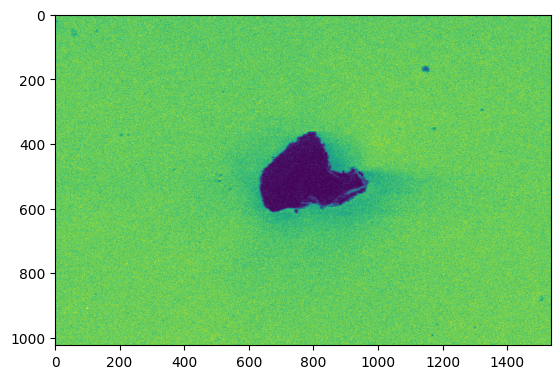

In [9]:
# take ion image
ib_image = acquire.new_image(microscope, image_settings_ib)

#checking image data
if ib_image.metadata.image_settings == image_settings_ib:
    print("Image settings are the same")
print(ib_image.metadata.microscope_state)
print(ib_image.metadata.version)


plt.imshow(ib_image.data)
plt.show()

In [15]:

gamma_settings.enabled = True
image_settings_eb = ImageSettings(
        resolution="1536x1024",
        dwell_time=1e-6,
        hfw=2700.0e-6,
        autocontrast=True,
        beam_type=BeamType.ION,
        gamma=gamma_settings,
        save=True,
        save_path="tests",
        label="label2",
        reduced_area=None,
    )


# take electron image
eb_image = acquire.new_image(microscope, image_settings_eb, None)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
#print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata)

#plt.imshow(eb_image.data,cmap='magma')
#plt.show()

## Saving metadata to image file ouput##



2022-11-25 14:49:19,590 — root — INFO — acquire_image:193 — acquiring new ION image.
Image settings are the same
FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.000998407608223642, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=6.500049532706002e-07, y=6.500049532706002e-07), microscope_state=MicroscopeState(timestamp='11/25/2022 15:01:48', absolute_position=StagePosition(x=-0.00029291667, y=0.00020516667, z=0.028904996, t=0.90755833, r=-0.017457065, coordinate_system=Raw), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.005545297080557298, beam_current=5e-11, hfw=0.0003, resolution='1536x1024', dwell_time=5e-07, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.0176441713413

FibsemImageMetadata(image_settings=ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.000998407608223642, autocontrast=True, beam_type=<BeamType.ION: 2>, save=True, label='label2', gamma=GammaSettings(enabled=True, min_gamma=0.5, max_gamma=1.8, scale_factor=0.01, threshold=46), save_path='tests', reduced_area=None), pixel_size=Point(x=6.500049532706002e-07, y=6.500049532706002e-07), microscope_state=MicroscopeState(timestamp='11/25/2022 15:01:48', absolute_position=StagePosition(), eb_settings=BeamSettings(beam_type=<BeamType.ELECTRON: 1>, working_distance=0.005545297080557298, beam_current=5e-11, hfw=0.0003, resolution='1536x1024', dwell_time=5e-07, stigmation=None, shift=None), ib_settings=BeamSettings(beam_type=<BeamType.ION: 2>, working_distance=0.01764417134135029, beam_current=2e-11, hfw=0.000998407608223642, resolution='768x512', dwell_time=2e-07, stigmation=None, shift=None)), version='v1')


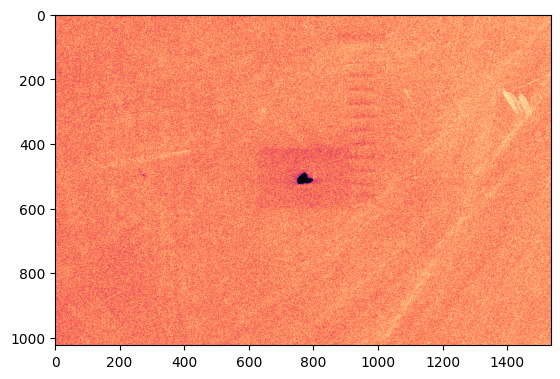

In [17]:
from fibsem import fibsemImage
img = fibsemImage.FibsemImage.load("tests\\label2_ib.tif")
plt.imshow(img.data,cmap='magma')
#plt.show()

print(img.metadata)
if img.metadata.microscope_state == eb_image.metadata.microscope_state:
    print("Metadata is the same")
#print(img.metadata)

In [ ]:
rectangle = FibsemRectangle(0.1, 0.1, 0.4, 0.4)
THERMO_ENABLED = True
image_settings_eb_reduced = ImageSettings(
        resolution="1536x1024",
        dwell_time=1.0e-6,
        hfw=300.0e-6,
        autocontrast=True,
        beam_type=BeamType.ELECTRON,
        gamma=gamma_settings,
        save=False,
        save_path="path",
        label="label",
        reduced_area=rectangle.__to_FEI__() if THERMO_ENABLED else rectangle,
    )

# take electron image with reduced area
eb_image = acquire.new_image(microscope, image_settings_eb_reduced, image_settings_eb_reduced.reduced_area)

#checking image data 
if eb_image.metadata.image_settings == image_settings_eb:
    print("Image settings are the same")
print(eb_image.metadata.microscope_state.timestamp)
print(eb_image.metadata.version)

plt.imshow(eb_image.data)
plt.show()